# <font color = "red">Q2) Problem Statment :
### <font color = "white">Delivery_time -> Predicting Salary using Year of experience

In [13]:
# Import required modules
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt

In [14]:
# Read the csv file into data_2(dataframe)
data_2 = pd.read_csv("Salary_Data.csv")
print(data_2.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


## <font color = 'yellow'> Check the data in order to perform EDA steps or not ?

In [15]:
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


In [16]:
# Basic Statistics
data_2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [17]:
# Check the null values.
data_2.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
# Check the duplicate records
data_2.duplicated().sum()

0

In [19]:
# Check the correlation 
print(data_2.corr())

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


## <font color = 'red'> Data Visualisation :


## <font color = 'Yellow'> 1) Histogram

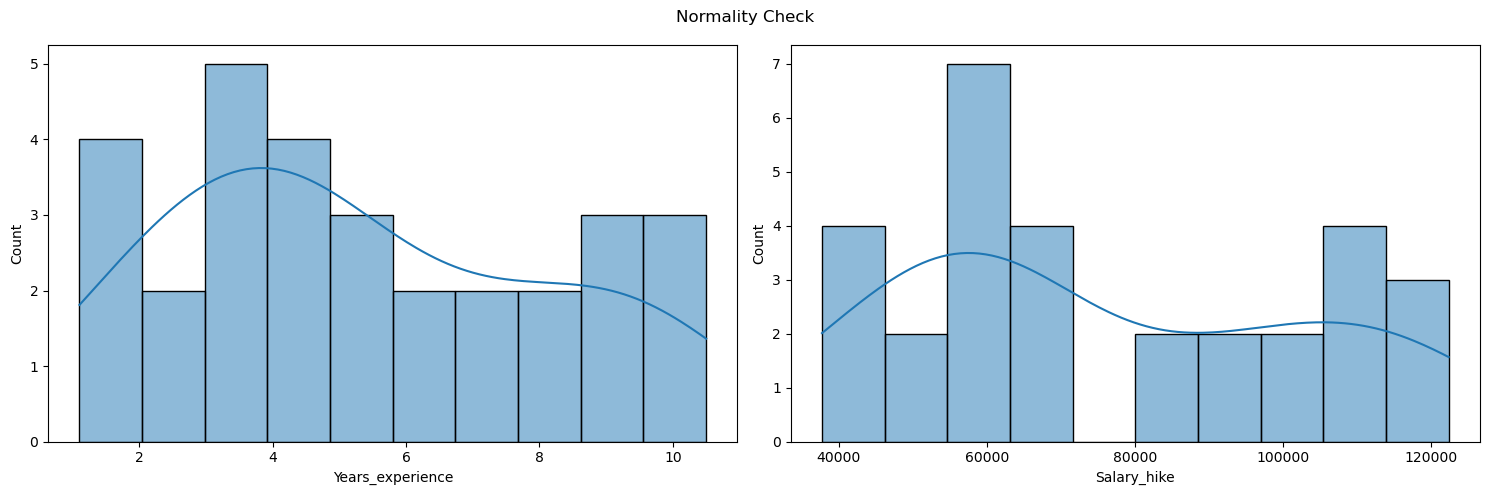

In [21]:
# Plot the histogram to check the distribution of the data.
fig, ax = plt.subplots(1,2, figsize = (15,5))
sb.histplot(data_2['YearsExperience'], bins = 10, kde = True, ax = ax[0])
sb.histplot(data_2['Salary'], bins = 10, kde = True, ax = ax[1])

ax[0].set_xlabel('Years_experience')
ax[1].set_xlabel('Salary_hike')
plt.suptitle("Normality Check")
plt.tight_layout()
plt.show()

## <font color = 'Yellow'> 2) Boxplot

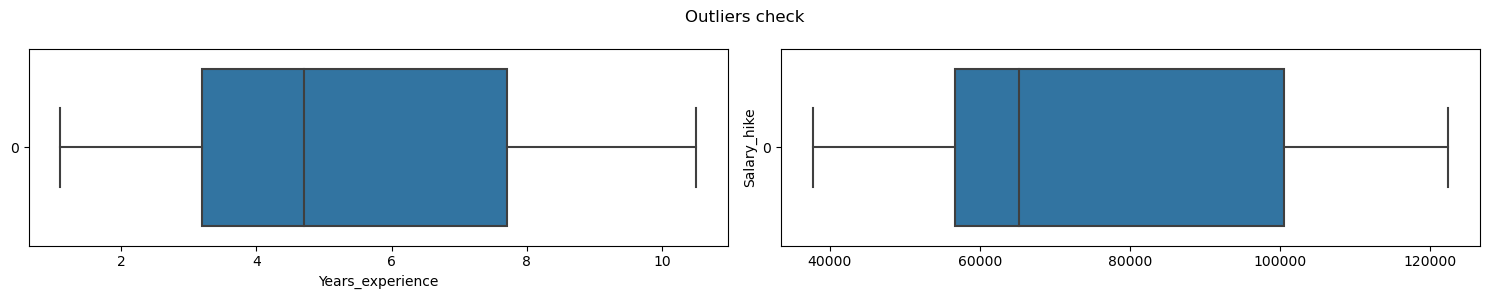

In [22]:
# Plot boxplot to check the outliers 
fig, ax = plt.subplots(1,2, figsize = (15,3))
sb.boxplot(data_2['YearsExperience'], ax = ax[0], orient = 'h')
sb.boxplot(data_2['Salary'], ax = ax[1], orient = 'h')

ax[0].set_xlabel('Years_experience')
ax[1].set_ylabel('Salary_hike')
plt.suptitle("Outliers check")
plt.tight_layout()
plt.show()

## <font color = 'Yellow'> 3) Regression plot

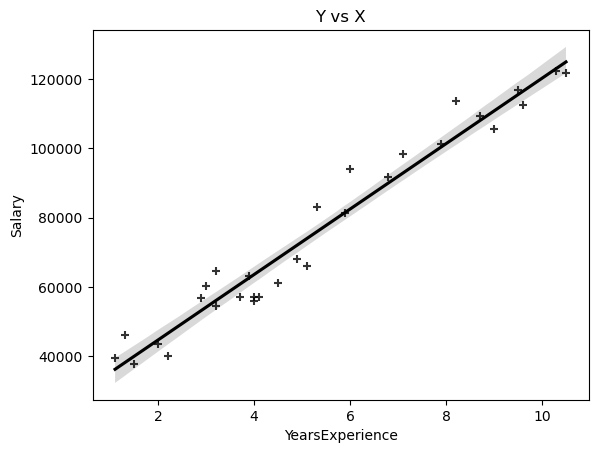

In [25]:
sb.regplot(x = 'YearsExperience', y = 'Salary', data = data_2, color = 'Black', marker = '+')
plt.title('Y vs X')
plt.show()

## <font color = 'Yellow'> 4) Heatmap

<Axes: >

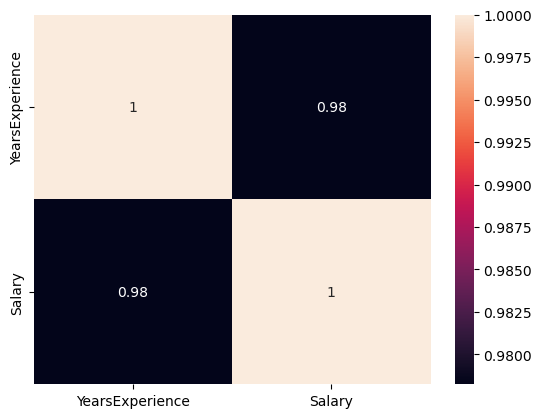

In [26]:
sb.heatmap(data_2.corr(), annot = True)

## <font color = 'red'> Model Building

In [27]:
# Read the data into separate columns
x = data_2['YearsExperience']
y= data_2['Salary']

# Perform OLS method to get b0 and b1 values in order to fit the line 
model_2 = smf.ols("y ~ x", data = data_2).fit()
#  Use summary() function to get our model details
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        18:59:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.0

In [29]:
# Values of b0 and b1 from model.summary()
b0 = 2.579e+04  
b1 = 9449.9623
# Line equation
y_hat = b0 + b1*x

In [30]:
print(y_hat.head(),'\n\n')
print(y.head())

0    36184.95853
1    38074.95099
2    39964.94345
3    44689.92460
4    46579.91706
Name: YearsExperience, dtype: float64 


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


## <font color = 'Yellow'> 5) Scatter plot

Text(0, 0.5, 'Salary')

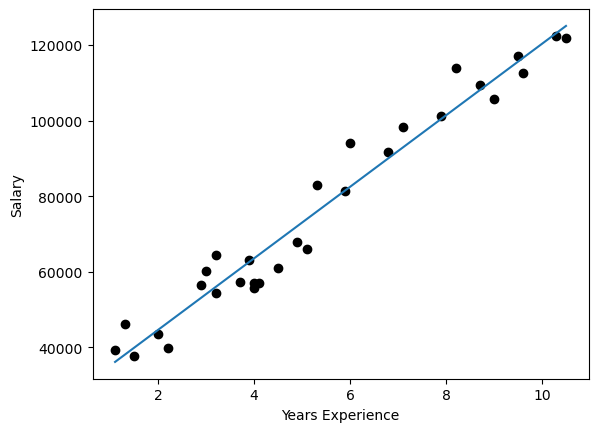

In [31]:
# Ploting line plot and scatter plot for our visulization
plt.plot(x, y_hat)
plt.scatter(x, y, c="black")

# Labeling the x and y axis
plt.xlabel("Years Experience")
plt.ylabel("Salary")

In [32]:
# Year of experience
Years_experience = 6 # replace with your value

# Create a new DataFrame for the Year of Experience
new_data_2 = pd.DataFrame({'x': [Years_experience]})

# Use the model to predict the Salary hike for the new year of experience
Salary_hike = model_2.predict(new_data_2)

print(f"The predicted salary hike for year of experience of {Years_experience} is {Salary_hike[0]}")


The predicted salary hike for year of experience of 6 is 82491.97412739915


In [48]:
data_2.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

## <font color = 'red'> Transformation of data :
## <font color = 'yellow'> Log Transformation 

In [34]:
# Tranforming the data into log data
log_Year_Experience = np.log(data_2['YearsExperience'])
log_Salary_hike = np.log(data_2['Salary'])

up_data = pd.DataFrame({'x' : log_Year_Experience,
                       'y' : log_Salary_hike})

In [35]:
up_data.head()

,x,y
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


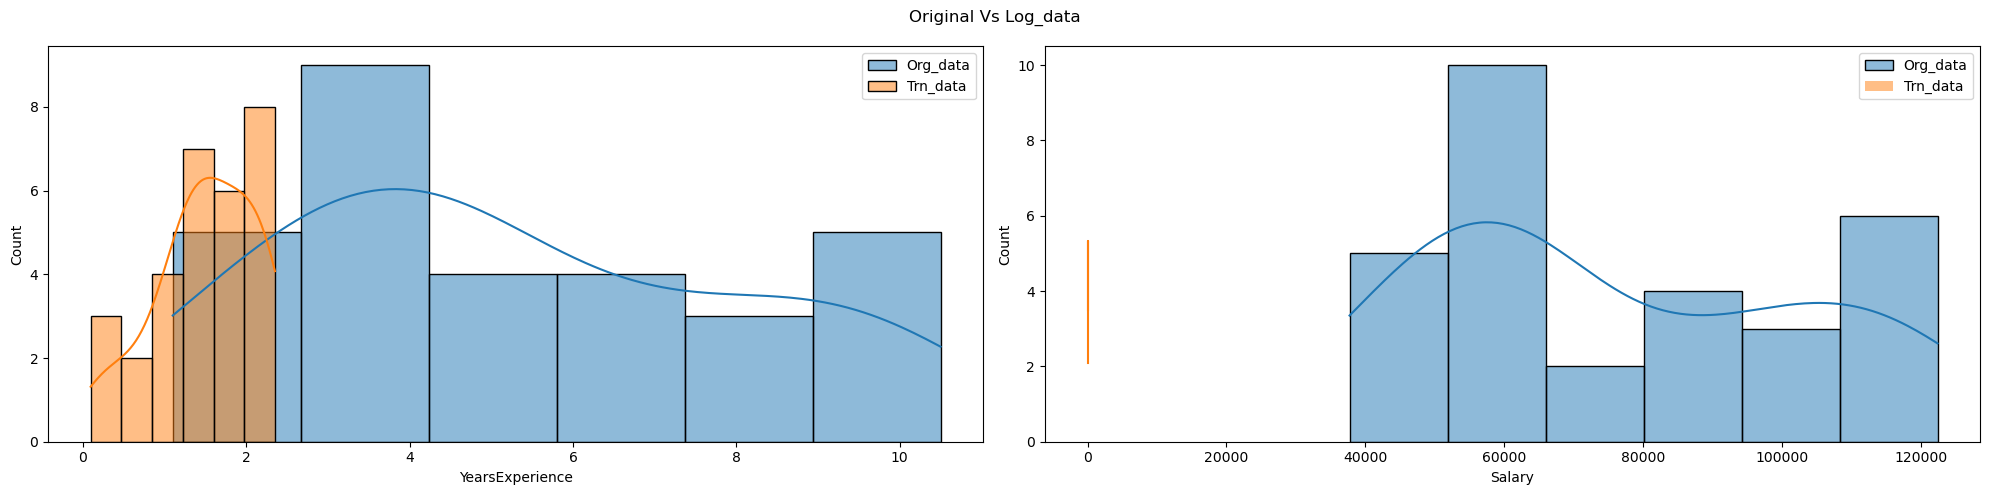

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Comparing Years of Experience
sb.histplot(data_2['YearsExperience'], kde=True, ax=ax[0], label='Org_data')
sb.histplot(up_data['x'], kde=True, ax=ax[0], label='Trn_data')

# Comparing Salary
sb.histplot(data_2['Salary'], kde=True, ax=ax[1], label='Org_data')
sb.histplot(up_data['y'], kde=True, ax=ax[1], label='Trn_data')

# Add legends to both plots
ax[0].legend()
ax[1].legend()

plt.suptitle("Original Vs Log_data")
plt.tight_layout()
plt.show()


In [41]:
# Read the data into separate columns
x = up_data['x']
y = up_data['y']

# Perform OLS method to get b0 and b1 values in order to fit the line 
updated_model = smf.ols("y ~ x", data = up_data).fit()

# Use summary() function to get our model details
print(updated_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           7.40e-16
Time:                        19:57:33   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.0

In [38]:
# Values of b0 and b1 from model.summary()
b0 = 10.3280
b1 = 0.5621
# Line equation
#x = sm.add_constant(x)
y_hat = b0 + b1*x

Text(0, 0.5, 'Salary')

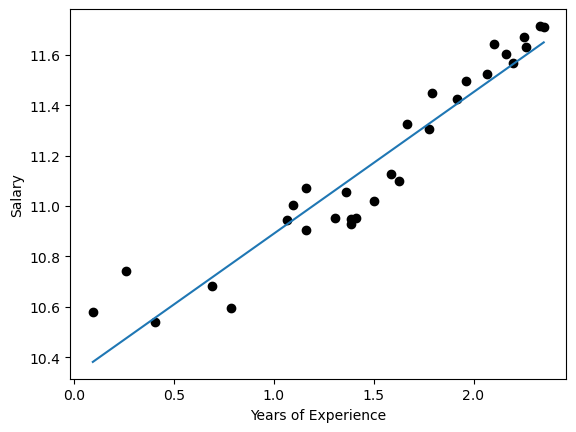

In [42]:
# Ploting line plot and scatter plot for our visulization
plt.plot(x, y_hat)
plt.scatter(x, y, c="black")

# Labeling the x and y axis
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [47]:
table = pd.DataFrame({'model' : [model_2.rsquared],
                     'updated_model' : [updated_model.rsquared]})

table

,model,updated_model
0,0.956957,0.905215


# First model has 95% accuracy, wheras secind updated model has 90% of accuracy in preducting. ***Hence consider first model***.